# Synthetic Aperture Radar (SAR) formulation

In SAR we transmit a waveform $h(t)$ at a position $\bm{p}_{tx}$ with our antenna pointed at a position on the ground $\bm{p}_{aim}$.  We trasnmit the waveform at a time $t_{tx}$ at the aimpoint and receive the reflected wave at a time $\tau_{rx}$ later.  Mathematically for a single pulse this can be represented as:
$$x(t) =  \sqrt{\frac{P_{t} G^2 \sigma \lambda^2}{(4\pi)^3 R_{tx}^2R_{rx}^2}}h(t-\tau_{rx})$$
where $h(t)$ is the transmitted waveform.  Recall that to achieve fine range resolution we used a chirp waveform which means we can rewrite this as:
$$h(t) = e^{2\pi f_c t + \pi \gamma t^2}$$
$$x(t) = \sqrt{\frac{P_{t} G_{t} G_{r} \sigma \lambda^2}{(4\pi)^3 R_{tx}^2R_{rx}^2}}e^{2\pi f_c (t-\tau_{rx}) + \pi \gamma (t-\tau_{rx})^2}$$  
Let's simplify this expression a bit.  Let's set the gain scaling terms to a constant $A$:
$$x(t) = Ae^{2\pi f_c (t-\tau_{rx}) + \pi \gamma (t-\tau_{rx})^2}$$
$$A=\sqrt{\frac{P_{t} G_{t} G_{r} \sigma \lambda^2}{(4\pi)^3 R_{tx}^2R_{rx}^2}}$$
Recall that our time delay to a point is computed as follows:
$$\tau_{rx} = \frac{|\bm{p}_{tx} - \bm{p}_{aim}|}{c} + \frac{|\bm{p}_{rx} - \bm{p}_{aim}|}{c}$$  

Using the monostatic approximation (transmitter and receiver) are the same we assume that $\bm{p}_{tx} = \bm{p}_{rx}$ and we can rewrite this as follows:
$$\tau_{rx} = 2\frac{|\bm{p}_{tx} - \bm{p}_{aim}|}{c}$$
The last simplifaction is to define $R = |\bm{p}_{tx} - \bm{p}_{aim}|$ and write the time delay as:
$$\tau_{rx} = \frac{2R}{c}$$  

We can now write the received waveform for a single pulse as:
$$x(t) = Ae^{2\pi f_c (t-\frac{2R}{c}) + \pi \gamma (t-\frac{2R}{c})^2}$$  
Rewriting this we can observe the following
To demodualte the signal (downconvert) we remove the carrier term from the data to bring it to a lower (intermediate frequency).  

$$x_{IF}(t) = \underbrace{Ae^{2\pi f_c (t-\frac{2R}{c}) + \pi \gamma (t-\frac{2R}{c})^2}}_{\text{received signal}}\underbrace{e^{2\pi f_{lo}t}}_{\text{local oscillator}}$$
multiplying this out yields

$$x_{IF}(t) = Ae^{2\pi (f_c - f_{lo})t}  e^{-2f_c\pi \frac{2R}{c}}e^{\pi \gamma (t-\frac{2R}{c})^2}$$


For simplicity, here we will completely remove the carrier ($f_{lo} = f_c$) to arrive at the zero IF solution which means we can re-write this as:

$$x_{IF}(t) = Ae^{\frac{-4\pi f_cR}{c}}e^{\pi \gamma (t-\frac{2R}{c})^2}$$

recall that $\lambda = \frac{c}{f}$ which means we can re-write this as

$$x_{IF}(t) = Ae^{\frac{-4\pi R}{\lambda}}e^{\pi \gamma (t-\frac{2R}{c})^2}$$  

Note that here we have only looked at the perspective of a single pulse.  Let's examine what happens as we send multiple pulses

## Looking at pulses over time (slow time)
In the previous section we looked at a single pulse.  In reality for SAR we send out a train of pulses as we move relative to the aimpoint.  What this means is before we treated the distance to our point $R$ as constant but really it's a function of time $t$.  Let's rewrite our definition of monostatic range as follows:
$$R(t) = |\bm{p}_{tx}(t) - \bm{p}_{aim}(t)|$$ 



# Notes
* Fast time vs slow time
* Add rect around equations

t_start=0.0, t_end=14.50183138839202
[-1493006.783 -5010561.349  3643742.621]
(256, 3)


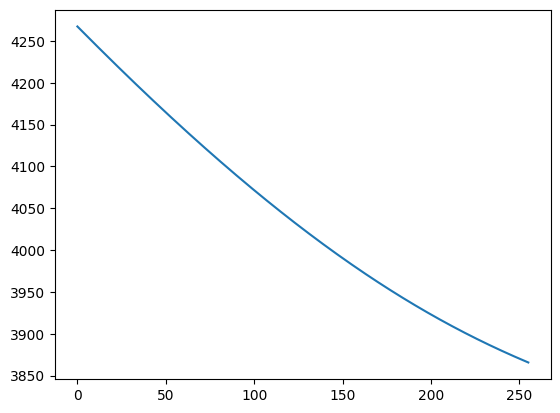

In [22]:
# trying to get ARP poly from https://six-library-github-public.s3.us-east-2.amazonaws.com/sicd_example_1_PFA_RE32F_IM32F_HH.nitf
from sarpy.io.complex.sicd import SICDReader
import numpy as np
import numpy.polynomial.polynomial as npp
reader = SICDReader('/mnt/c/Users/Austin/Documents/GitHub/radar_learning/sicd_example_1_PFA_RE32F_IM32F_HH.nitf')
sicd_meta = reader.sicd_meta 
arp_poly = sicd_meta.Position.ARPPoly.get_array()

n_coeff = sicd_meta.Position.ARPPoly.get_array()[0].Coefs.shape[0]
arp_poly = np.zeros((3, n_coeff))

for ii, c in enumerate(sicd_meta.Position.ARPPoly):
    arp_poly[ii, :] = c.Coefs

t_start = sicd_meta.ImageFormation.TStartProc
t_end = sicd_meta.ImageFormation.TEndProc
times = np.linspace(t_start, t_end, 256)
print(f'{t_start=}, {t_end=}')
 
arp_pos = npp.polyval(times, arp_poly.T).T
p_scp = sicd_meta.GeoData.SCP.ECF.get_array()
print(p_scp)
print(arp_pos.shape)
R = np.linalg.norm(arp_pos - p_scp, axis=-1)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(R)

